# Prediction of vehicle insurance

In [2]:
#Problem statement: predict whether a customer would be interested in Vehicle Insurance

Import libraries

In [3]:
import numpy as np 
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Load Dataset

In [4]:
data=pd.read_csv("train.csv")

In [5]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [6]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [7]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [8]:
data.shape

(381109, 12)

In [9]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [11]:
data.duplicated().sum()

0

#  Missing value is present or not

In [12]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Column drop

In [13]:
l_id=data["id"]
l_id

0              1
1              2
2              3
3              4
4              5
           ...  
381104    381105
381105    381106
381106    381107
381107    381108
381108    381109
Name: id, Length: 381109, dtype: int64

In [14]:
vehicle_id=data['id']
vehicle_id

0              1
1              2
2              3
3              4
4              5
           ...  
381104    381105
381105    381106
381106    381107
381107    381108
381108    381109
Name: id, Length: 381109, dtype: int64

In [15]:
data=data.drop(['id'] ,axis=1)
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [16]:
Region_Code=data['Region_Code']
Region_Code

0         28
1          3
2         28
3         11
4         41
          ..
381104    26
381105    37
381106    30
381107    14
381108    29
Name: Region_Code, Length: 381109, dtype: int64

In [17]:
data=data.drop(['Region_Code'] ,axis=1)
data

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1,1-2 Year,No,30170,26,88,0
381105,Male,30,1,1,< 1 Year,No,40016,152,131,0
381106,Male,21,1,1,< 1 Year,No,35118,160,161,0
381107,Female,68,1,0,> 2 Years,Yes,44617,124,74,0


In [18]:
Driving_License=data['Driving_License']
Driving_License

0         1
1         1
2         1
3         1
4         1
         ..
381104    1
381105    1
381106    1
381107    1
381108    1
Name: Driving_License, Length: 381109, dtype: int64

In [19]:
data=data.drop(['Driving_License'] ,axis=1)
data

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,0,1-2 Year,No,33536,26,183,0
2,Male,47,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1-2 Year,No,30170,26,88,0
381105,Male,30,1,< 1 Year,No,40016,152,131,0
381106,Male,21,1,< 1 Year,No,35118,160,161,0
381107,Female,68,0,> 2 Years,Yes,44617,124,74,0


# data type conversion

# Replace method

In [20]:
#for gender
data.Gender.replace({"Male":0,"Female":1},inplace=True)

In [21]:
data.Gender.value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

In [22]:
#Vehicle_Age
data.Vehicle_Age.replace({"< 1 Year":0,"1-2 Year":1,"> 2 Years":2},inplace=True)

In [23]:
data.Vehicle_Age.value_counts()

1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64

In [24]:
#Vehicle_Damage  

In [25]:
data.Vehicle_Damage.replace({"No":0,"Yes":1},inplace=True)

In [26]:
data.Vehicle_Damage.value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

In [27]:
data.dtypes

Gender                  int64
Age                     int64
Previously_Insured      int64
Vehicle_Age             int64
Vehicle_Damage          int64
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
Response                int64
dtype: object

# EDA - Exploratory Data Analysis

In [28]:
x=data.corr()
x

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.145545,0.081932,-0.160427,-0.091606,-0.003673,0.111159,0.002517,-0.052440
Age,-0.145545,1.000000,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Previously_Insured,0.081932,-0.254682,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.160427,0.765790,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.091606,0.267534,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,-0.003673,0.067507,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,0.111159,-0.577826,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,0.002517,-0.001264,0.002537,-0.001892,-0.002064,-0.000608,0.000002,1.000000,-0.001050
Response,-0.052440,0.111147,-0.341170,0.221874,0.354400,0.022575,-0.139042,-0.001050,1.000000


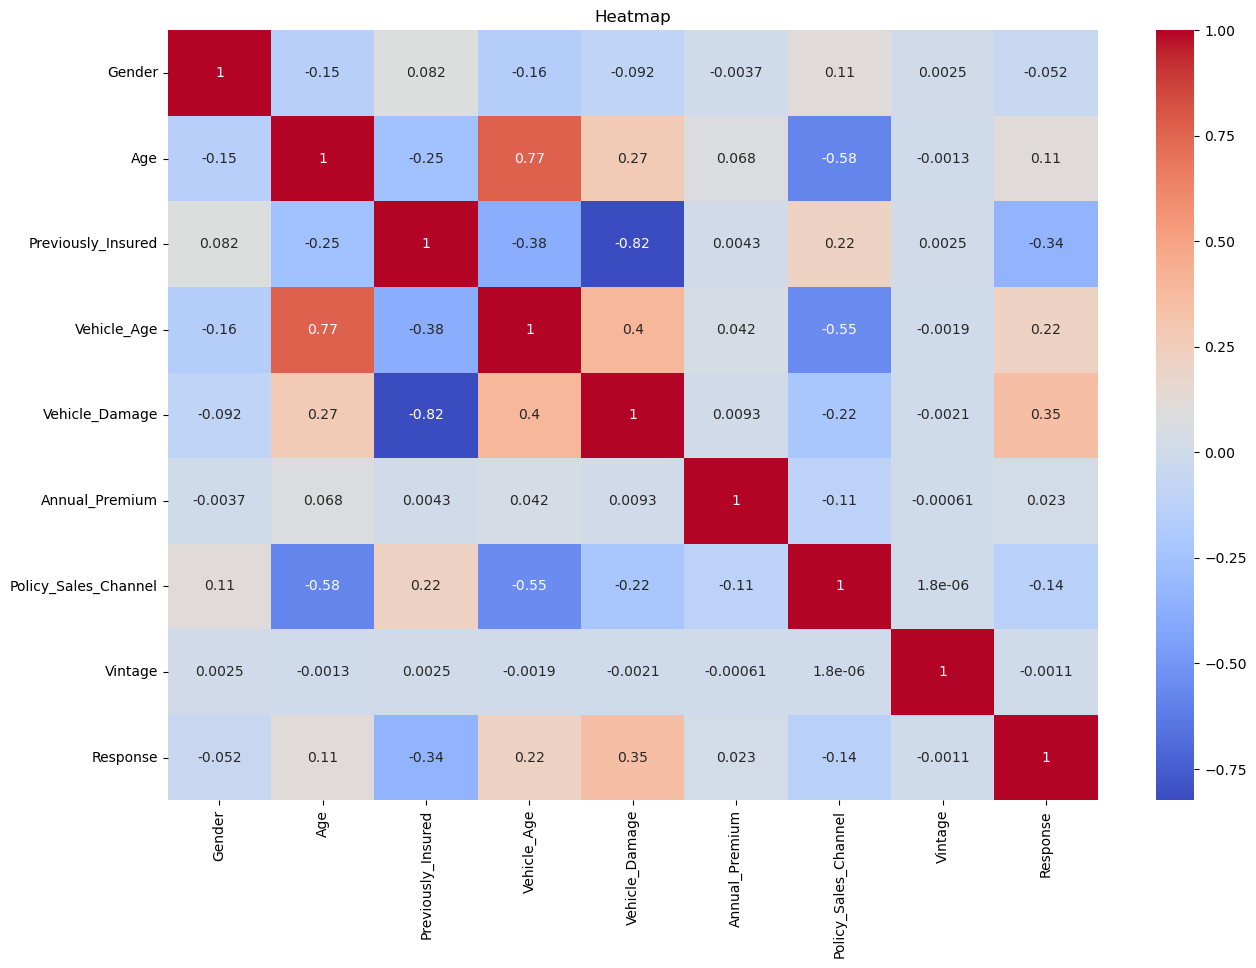

In [29]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

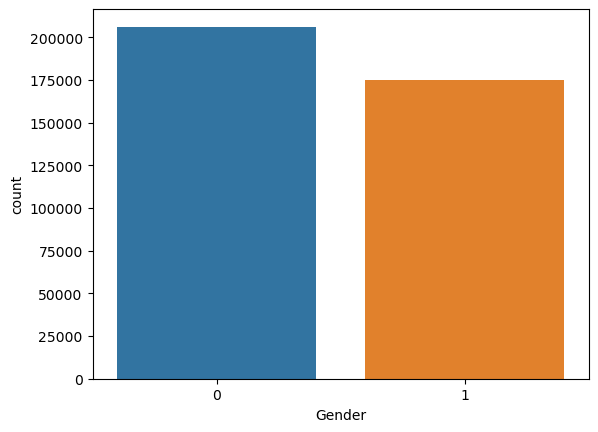

In [30]:
sns.countplot(x=data.Gender)

<Axes: xlabel='Previously_Insured', ylabel='count'>

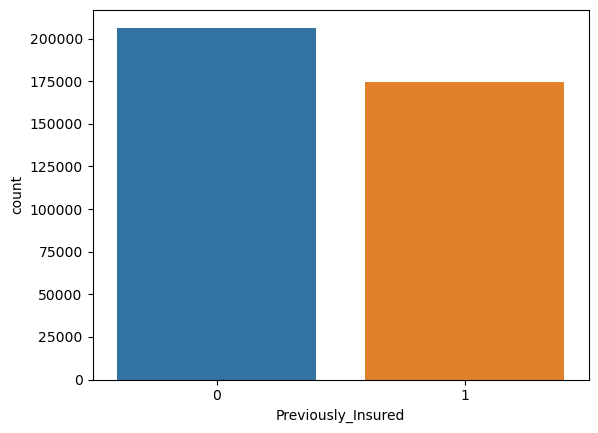

In [31]:
sns.countplot(x='Previously_Insured', data=data)

[]

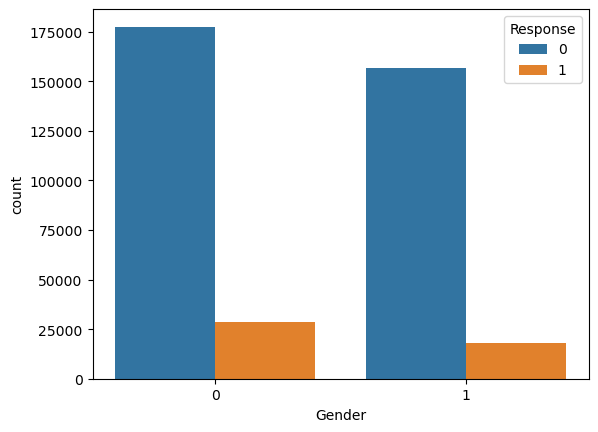

In [32]:
sns.countplot(x='Gender',data=data,hue='Response')
plt.plot()

<Axes: xlabel='Vehicle_Age', ylabel='count'>

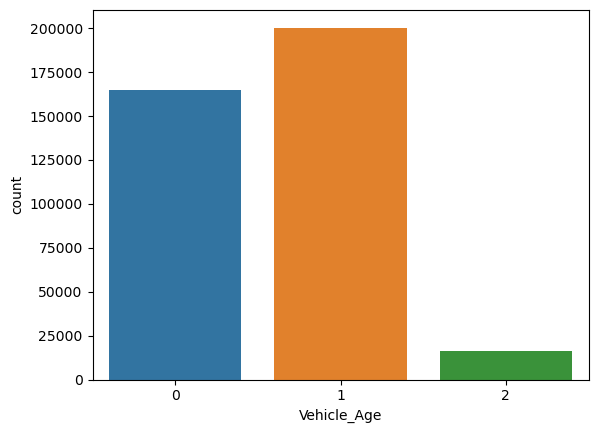

In [33]:
sns.countplot(x=data.Vehicle_Age,data =data)

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

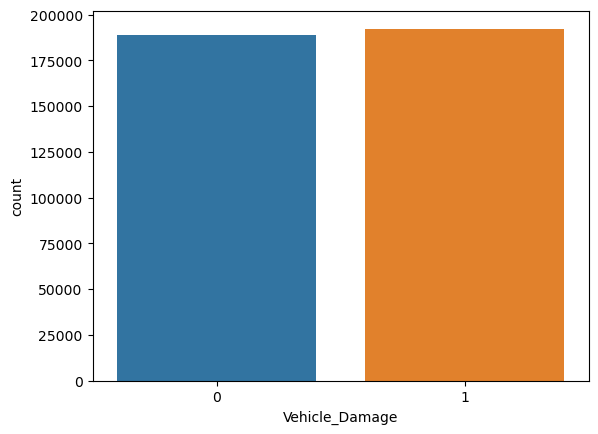

In [34]:
sns.countplot(x='Vehicle_Damage', data=data)

# Check model before EDA

# Split data

In [35]:
x=data.drop(columns='Response',axis=1)
y=data['Response']

# Train-Test-Split


In [36]:

from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304887, 8), (76222, 8), (304887,), (76222,))

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304887, 8), (76222, 8), (304887,), (76222,))

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [40]:
lg.fit(x_train,y_train)

LogisticRegression()

In [41]:
lg_p=lg.predict(x_test)
lg_p


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
cf=confusion_matrix(lg_p,y_test)
cf

array([[65902,  8872],
       [  913,   535]], dtype=int64)

In [44]:
lg_acc=cf.diagonal().sum()/cf.sum()*100
lg_acc

87.16249901603211

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [46]:
beda_log_precision = precision_score(y_test,lg_p)
beda_log_recall = recall_score(y_test,lg_p)
beda_log_f1score = f1_score(y_test,lg_p)

In [47]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     74774
           1       0.06      0.37      0.10      1448

    accuracy                           0.87     76222
   macro avg       0.52      0.63      0.51     76222
weighted avg       0.97      0.87      0.92     76222



# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[60008,  6547],
       [ 6807,  2860]], dtype=int64)

In [52]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

82.48012384875759

In [53]:
dt.feature_importances_

array([0.03025835, 0.14020408, 0.01271793, 0.0118786 , 0.12698392,
       0.31974317, 0.04589668, 0.31231727])

In [54]:
dt_df1=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df1

,Importance,columns
0,0.030258,Gender
1,0.140204,Age
2,0.012718,Previously_Insured
3,0.011879,Vehicle_Age
4,0.126984,Vehicle_Damage
5,0.319743,Annual_Premium
6,0.045897,Policy_Sales_Channel
7,0.312317,Vintage


In [55]:
beda_dt_precision = precision_score(y_test,dt_p)
beda_dt_recall = recall_score(y_test,dt_p)
beda_dt_f1score = f1_score(y_test,dt_p)

In [56]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66555
           1       0.30      0.30      0.30      9667

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[64120,  7929],
       [ 2695,  1478]], dtype=int64)

In [61]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

86.06176694392695

In [62]:
beda_rf_precision = precision_score(y_test,rf_p)
beda_rf_recall = recall_score(y_test,rf_p)
beda_rf_f1score = f1_score(y_test,rf_p)

In [63]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     72049
           1       0.16      0.35      0.22      4173

    accuracy                           0.86     76222
   macro avg       0.56      0.62      0.57     76222
weighted avg       0.92      0.86      0.88     76222



# AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [66]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [67]:
ad_p=adbo.predict(x_test)
ad_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[59070,  6174],
       [ 7745,  3233]], dtype=int64)

In [69]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

81.73886804334707

In [70]:
beda_ada_precision = precision_score(y_test,ad_p)
beda_ada_recall = recall_score(y_test,ad_p)
beda_ada_f1score = f1_score(y_test,ad_p)

In [71]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     65244
           1       0.34      0.29      0.32     10978

    accuracy                           0.82     76222
   macro avg       0.61      0.60      0.61     76222
weighted avg       0.81      0.82      0.81     76222



# xgboost

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [73]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [74]:
xgb_p=xgb.predict(x_test)

In [75]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[66623,  9229],
       [  192,   178]], dtype=int64)

In [76]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

87.64005142872136

In [77]:
beda_xg_precision = precision_score(y_test,xgb_p)
beda_xg_recall = recall_score(y_test,xgb_p)
beda_xg_f1score = f1_score(y_test,xgb_p)

In [78]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     75852
           1       0.02      0.48      0.04       370

    accuracy                           0.88     76222
   macro avg       0.51      0.68      0.49     76222
weighted avg       0.99      0.88      0.93     76222



In [79]:
xgb_prob=xgb.predict_proba(x_test)
xgb_prob

array([[6.4623749e-01, 3.5376248e-01],
       [9.9987829e-01, 1.2173386e-04],
       [6.8274784e-01, 3.1725213e-01],
       ...,
       [6.4298129e-01, 3.5701868e-01],
       [9.9958843e-01, 4.1158512e-04],
       [8.9439493e-01, 1.0560507e-01]], dtype=float32)

In [80]:
df=pd.DataFrame(xgb_prob)
df

,0,1
0,0.646237,0.353762
1,0.999878,0.000122
2,0.682748,0.317252
3,0.906509,0.093491
4,0.655722,0.344278
...,...,...
76217,0.999514,0.000486
76218,0.997962,0.002038
76219,0.642981,0.357019
76220,0.999588,0.000412


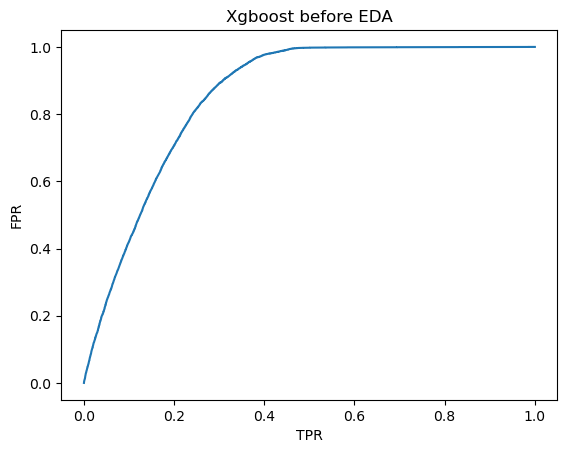

In [81]:
xgb_prob=xgb.predict_proba(x_test)
xgb_df=pd.DataFrame(xgb_prob)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_test,xgb_df.iloc[:,1])
plt.plot(xgb_fpr,xgb_tpr)
plt.title('Xgboost before EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [83]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [84]:
k_p=knn.predict(x_test)

In [85]:
ck=confusion_matrix(k_p,y_test)
ck

array([[66807,  9403],
       [    8,     4]], dtype=int64)

In [86]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

87.65317100049855

In [87]:
beda_knn_precision = precision_score(y_test,k_p)
beda_knn_recall = recall_score(y_test,k_p)
beda_knn_f1score = f1_score(y_test,k_p)

In [88]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     76210
           1       0.00      0.33      0.00        12

    accuracy                           0.88     76222
   macro avg       0.50      0.60      0.47     76222
weighted avg       1.00      0.88      0.93     76222



# Naive_bayes 

In [89]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [90]:
nb.fit(x_train,y_train)

MultinomialNB()

In [91]:
n_p=nb.predict(x_test)

In [92]:
nc=confusion_matrix(n_p,y_test)
nc

array([[46368,  4693],
       [20447,  4714]], dtype=int64)

In [93]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

67.01739655217654

In [94]:
beda_nb_precision = precision_score(y_test,n_p)
beda_nb_recall = recall_score(y_test,n_p)
beda_nb_f1score = f1_score(y_test,n_p)

In [95]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79     51061
           1       0.50      0.19      0.27     25161

    accuracy                           0.67     76222
   macro avg       0.60      0.55      0.53     76222
weighted avg       0.63      0.67      0.62     76222



# Before EDA results

In [96]:
list1=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","KNN","Naive bayes"]
list2=[lg_acc,dt_acc,rf_acc,ad_acc,xgb_acc,kacc,acc_n]
list3=[beda_log_precision,beda_dt_precision,beda_rf_precision,beda_ada_precision,beda_xg_precision,beda_knn_precision,beda_nb_precision]
list4=[beda_log_recall,beda_dt_recall,beda_rf_recall,beda_ada_recall,beda_xg_recall,beda_knn_recall,beda_nb_recall]
list5=[beda_log_f1score,beda_dt_f1score,beda_rf_f1score,beda_ada_f1score,beda_xg_f1score,beda_knn_f1score,beda_nb_f1score]

In [97]:
before_eda=pd.DataFrame({"Model_Name":list1,"accuracy":list2,"precision":list3,"recall":list4,"f1score":list5})
before_eda

,Model_Name,accuracy,precision,recall,f1score
0,LogisticRegression,87.162499,0.369475,0.056873,0.098572
1,DecisionTreeClassifier,82.480124,0.295852,0.304029,0.299885
2,RandomForestClassifier,86.061767,0.354182,0.157117,0.217673
3,AdaBoostClassifier,81.738868,0.294498,0.343680,0.317194
4,XGBClassifier,87.640051,0.481081,0.018922,0.036412
5,KNN,87.653171,0.333333,0.000425,0.000849
6,Naive bayes,67.017397,0.187353,0.501116,0.272738


# Class imbalance Treatment

In [98]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [99]:
c_0,c_1=data["Response"].value_counts()
c_0,c_1

(334399, 46710)

In [100]:
train_0=data[data["Response"]==0]
train_1=data[data["Response"]==1]

In [101]:
train_0.shape,train_1.shape

((334399, 9), (46710, 9))

# Random Under Sampling

In [102]:
class_0under=train_0.sample(c_1)

In [103]:
class0_1=pd.concat([class_0under,train_1],axis=0)
class0_1.head(1)

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
161467,1,61,0,1,1,2630,124,76,0


In [104]:
class0_1.shape

(93420, 9)

In [105]:
class0_1.Response.value_counts()

0    46710
1    46710
Name: Response, dtype: int64

In [106]:
u_x=class0_1.drop(columns='Response',axis=1)
u_y=class0_1["Response"]

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape


((74736, 8), (18684, 8), (74736,), (18684,))

# Outlier tretment

<Axes: >

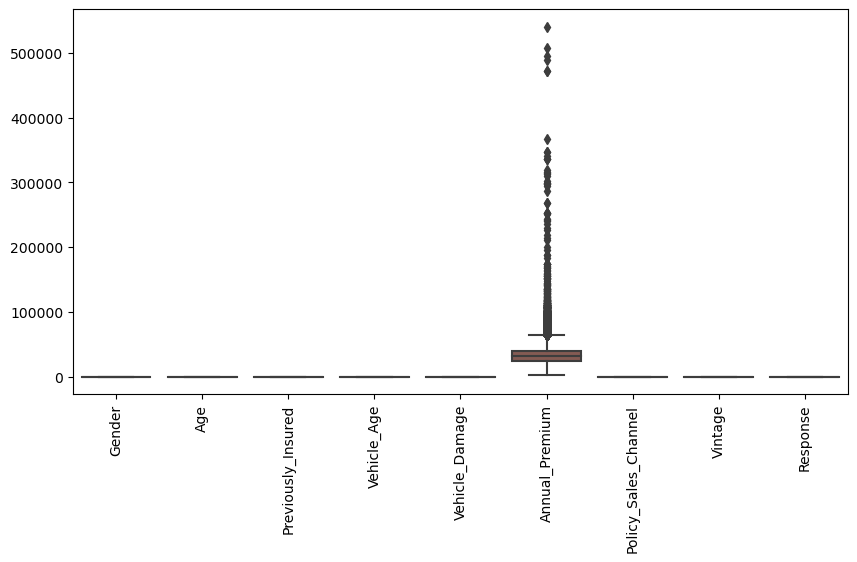

In [109]:
fig=plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data=class0_1)

<Axes: >

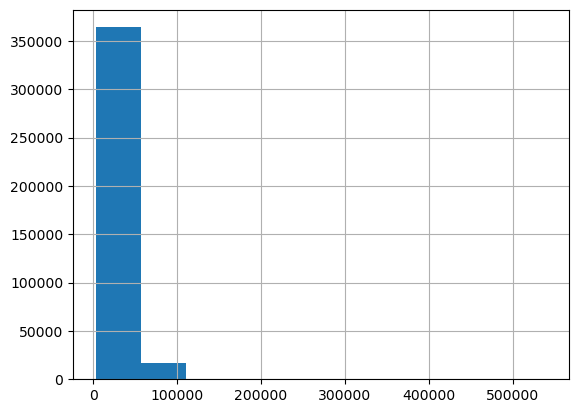

In [110]:
data.Annual_Premium.hist()

<Axes: xlabel='Annual_Premium', ylabel='Density'>

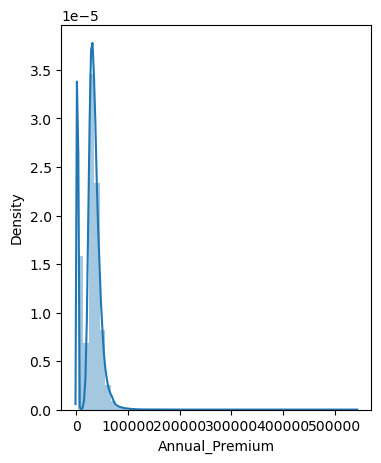

In [111]:
fig=plt.figure(figsize=(4,5))
sns.distplot(data.Annual_Premium)

<Axes: ylabel='Annual_Premium'>

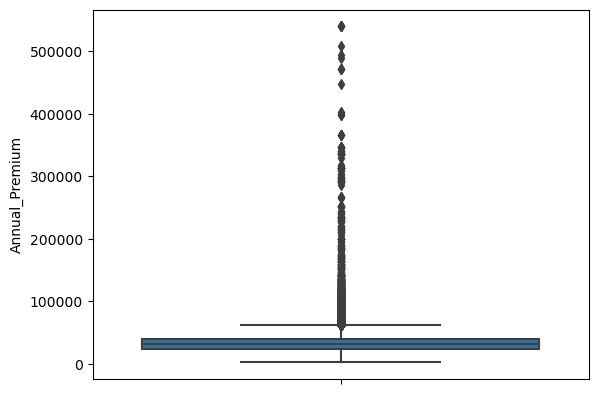

In [112]:
sns.boxplot(data=data,y="Annual_Premium")

In [113]:
data["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [114]:
iqr=data.Annual_Premium.quantile(0.75)-data.Annual_Premium.quantile(0.25)
iqr

14995.0

In [115]:
lb=data["Annual_Premium"].quantile(0.25)-(iqr*3)
ub=data["Annual_Premium"].quantile(0.75)+(iqr*3)
print(lb,ub)

-20580.0 84385.0


In [116]:
data.loc[data["Annual_Premium"]>84385.0,"Annual_Premium"]=84385.0

<Axes: xlabel='Annual_Premium', ylabel='Density'>

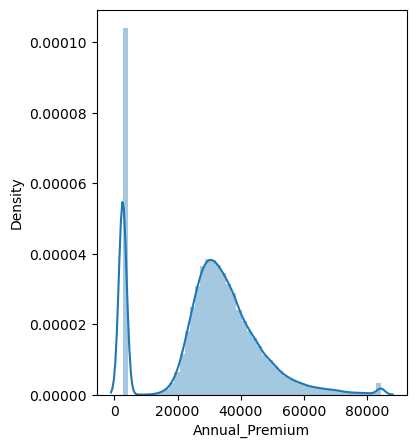

In [117]:
fig=plt.figure(figsize=(4,5))
sns.distplot(data.Annual_Premium)

<Axes: ylabel='Annual_Premium'>

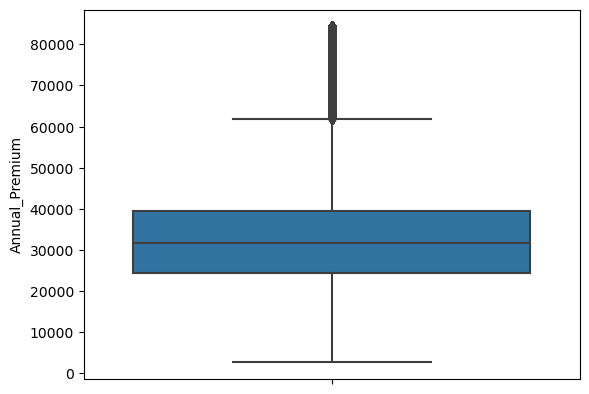

In [118]:
sns.boxplot(data=data,y="Annual_Premium")

In [119]:
data.skew()

Gender                  0.163590
Age                     0.672539
Previously_Insured      0.167747
Vehicle_Age             0.252896
Vehicle_Damage         -0.019507
Annual_Premium         -0.050990
Policy_Sales_Channel   -0.900008
Vintage                 0.003030
Response                2.301906
dtype: float64

# Model After Outlier 

In [120]:
x1=class0_1.iloc[:,0:-1]
y1=class0_1.iloc[:,-1]

In [121]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [122]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((74736, 8), (18684, 8), (74736,), (18684,))

# Feature Selection 

# RFE=Recursive FS

In [123]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [124]:
rfe=RFE(dTree)

In [125]:
rfe.fit(class0_1.iloc[:,1:],class0_1.iloc[:,0])

RFE(estimator=DecisionTreeClassifier())

In [126]:
rfe.support_

array([ True, False, False, False,  True,  True,  True, False])

In [127]:
df1=pd.DataFrame({"Score":list(rfe.support_),"columns":list(data.iloc[:,0:8])})
df1   

,Score,columns
0,True,Gender
1,False,Age
2,False,Previously_Insured
3,False,Vehicle_Age
4,True,Vehicle_Damage
5,True,Annual_Premium
6,True,Policy_Sales_Channel
7,False,Vintage


In [143]:
df1=df1.sort_values(["Score"],ascending=False)
df1

,Score,columns
0,True,Gender
4,True,Vehicle_Damage
5,True,Annual_Premium
6,True,Policy_Sales_Channel
1,False,Age
2,False,Previously_Insured
3,False,Vehicle_Age
7,False,Vintage


In [144]:
data2=class0_1.drop(["Gender","Previously_Insured","Vehicle_Age","Policy_Sales_Channel"],axis=1)
data2.head(2)

,Age,Vehicle_Damage,Annual_Premium,Vintage,Response
161467,61,1,2630,76,0
168982,44,0,38268,46,0


In [145]:
f_x=data2.iloc[:,0:-1]
f_y=data2.iloc[:,-1]

In [146]:
f_x.shape,f_y.shape

((93420, 4), (93420,))

In [147]:
f_x_train,f_x_test,f_y_train,f_y_test=train_test_split(f_x,f_y,test_size=0.2,random_state=100)
f_x_train.shape,f_x_test.shape,f_y_train.shape,f_y_test.shape

((74736, 4), (18684, 4), (74736,), (18684,))

# Model After Outlier Treatment

# Logistic Regression

In [148]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [149]:
lg_p1=lg.predict(x1_test)
lg_p1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [150]:
lg_cf1=confusion_matrix(lg_p1,y1_test)
lg_cf1

array([[5686,  421],
       [3713, 8864]], dtype=int64)

In [151]:
lg_a1=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
lg_a1


77.87411689145793

In [152]:
log_precision = precision_score(y1_test,lg_p1)
log_recall = recall_score(y1_test,lg_p1)
log_f1score = f1_score(y1_test,lg_p1)

In [153]:
print(classification_report(lg_p1,y1_test))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73      6107
           1       0.95      0.70      0.81     12577

    accuracy                           0.78     18684
   macro avg       0.78      0.82      0.77     18684
weighted avg       0.84      0.78      0.79     18684



# Decision tree

In [154]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [155]:
dt_p1=dt.predict(x1_test)
dt_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [156]:
dt_cf1=confusion_matrix(dt_p1,y1_test)
dt_cf1

array([[6772, 2709],
       [2627, 6576]], dtype=int64)

In [157]:
dt_acc1=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_acc1

71.44080496681653

In [158]:
dt_precision = precision_score(y1_test,dt_p1)
dt_recall = recall_score(y1_test,dt_p1)
dt_f1score = f1_score(y1_test,dt_p1)

In [159]:
print(classification_report(dt_p1,y1_test))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      9481
           1       0.71      0.71      0.71      9203

    accuracy                           0.71     18684
   macro avg       0.71      0.71      0.71     18684
weighted avg       0.71      0.71      0.71     18684



# Random forest

In [160]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [161]:
rf_p1=rf.predict(x1_test)
rf_p1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [162]:
rf_cf1=confusion_matrix(rf_p1,y1_test)
rf_cf1

array([[6454, 1379],
       [2945, 7906]], dtype=int64)

In [163]:
rf_acc1=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_acc1

76.85720402483408

In [164]:
rf_precision = precision_score(y1_test,rf_p1)
rf_recall = recall_score(y1_test,rf_p1)
rf_f1score = f1_score(y1_test,rf_p1)

In [165]:
print(classification_report(rf_p1,y1_test))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      7833
           1       0.85      0.73      0.79     10851

    accuracy                           0.77     18684
   macro avg       0.77      0.78      0.77     18684
weighted avg       0.78      0.77      0.77     18684



# Ada boost

In [166]:
adbo.fit(x1_train,y1_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [167]:
ad_p1=adbo.predict(x1_test)
ad_p1

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [168]:
ad_cf1=confusion_matrix(ad_p1,y1_test)
ad_cf1


array([[6793, 2699],
       [2606, 6586]], dtype=int64)

In [169]:
ad_acc1=ad_cf1.diagonal().sum()/ad_cf1.sum()*100
ad_acc1

71.60672232926568

In [170]:
ada_precision = precision_score(y1_test,ad_p1)
ada_recall = recall_score(y1_test,ad_p1)
ada_f1score = f1_score(y1_test,ad_p1)

In [171]:
print(classification_report(ad_p1,y1_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      9492
           1       0.71      0.72      0.71      9192

    accuracy                           0.72     18684
   macro avg       0.72      0.72      0.72     18684
weighted avg       0.72      0.72      0.72     18684



# XG BOOST

In [172]:
xgb.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [173]:
xgb_p1=xgb.predict(x1_test)
xgb_p1

array([0, 1, 1, ..., 1, 1, 1])

In [174]:
xgb_cf1=confusion_matrix(xgb_p1,y1_test)
xgb_cf1

array([[6328,  808],
       [3071, 8477]], dtype=int64)

In [175]:
xgb_acc1=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_acc1

79.23892100192678

In [176]:
xg_precision = precision_score(y1_test,xgb_p1)
xg_recall = recall_score(y1_test,xgb_p1)
xg_f1score = f1_score(y1_test,xgb_p1)

In [177]:
print(classification_report(xgb_p1,y1_test))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77      7136
           1       0.91      0.73      0.81     11548

    accuracy                           0.79     18684
   macro avg       0.79      0.81      0.79     18684
weighted avg       0.82      0.79      0.80     18684



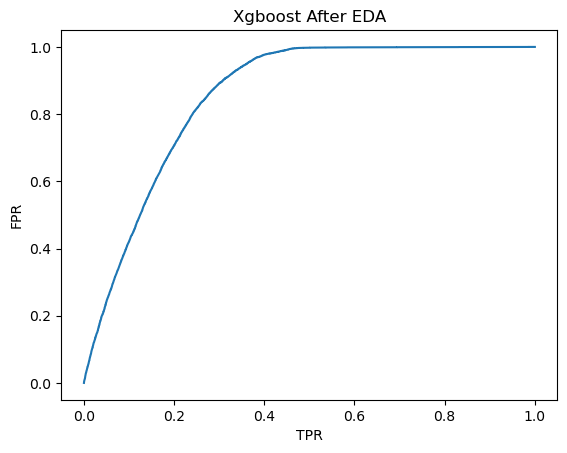

In [201]:
xgb_prob=xgb.predict_proba(x_test)
xgb_df=pd.DataFrame(xgb_prob)
xgb1_fpr,xgb1_tpr,xgb1_threshold=roc_curve(y_test,xgb_df.iloc[:,1])
plt.plot(xgb_fpr,xgb_tpr)
plt.title('Xgboost After EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# KNN

In [185]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=24)

In [186]:
k_p1=knn.predict(x1_test)
k_p1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [187]:
kcf1=confusion_matrix(k_p1,y1_test)
kcf1

array([[5815, 3886],
       [3584, 5399]], dtype=int64)

In [188]:
acc_k=kcf1.diagonal().sum()/kcf1.sum()*100
acc_k


60.01926782273603

In [189]:
knn_precision = precision_score(y1_test,k_p1)
knn_recall = recall_score(y1_test,k_p1)
knn_f1score = f1_score(y1_test,k_p1)

In [190]:
print(classification_report(k_p1,y1_test))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9701
           1       0.58      0.60      0.59      8983

    accuracy                           0.60     18684
   macro avg       0.60      0.60      0.60     18684
weighted avg       0.60      0.60      0.60     18684



# Naive Bayes

In [191]:
nb.fit(x1_train,y1_train)

MultinomialNB()

In [192]:
n_p1=nb.predict(x1_test)
n_p1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [193]:
ncf1=confusion_matrix(n_p1,y1_test)
ncf1

array([[6330, 4387],
       [3069, 4898]], dtype=int64)

In [194]:
acc_n=ncf1.diagonal().sum()/ncf1.sum()*100
acc_n


60.09419824448726

In [195]:
nb_precision = precision_score(y1_test,n_p1)
nb_recall = recall_score(y1_test,n_p1)
nb_f1score = f1_score(y1_test,n_p1)

In [196]:
print(classification_report(n_p1,y1_test))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63     10717
           1       0.53      0.61      0.57      7967

    accuracy                           0.60     18684
   macro avg       0.60      0.60      0.60     18684
weighted avg       0.61      0.60      0.60     18684



In [197]:
list6=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","KNN","Naive Bayes "]
list7=[lg_a1,dt_acc1,rf_acc1,ad_acc1,xgb_acc,acc_k,acc_n]
list8=[log_precision,dt_precision,rf_precision,ada_precision,xg_precision,knn_precision,nb_precision]
list9=[log_recall,dt_recall,rf_recall,ada_recall,xg_recall,knn_recall,nb_recall]
list10=[log_f1score,dt_f1score,rf_f1score,ada_f1score,xg_f1score,knn_f1score,nb_f1score]

In [198]:
after_eda=pd.DataFrame({"Model_Name":list6,"accuracy":list7,"precision":list8,"recall":list9,"f1score":list10})
after_eda

,Model_Name,accuracy,precision,recall,f1score
0,LogisticRegression,77.874117,0.704779,0.954658,0.810905
1,DecisionTreeClassifier,71.440805,0.714550,0.708239,0.711380
2,RandomForestClassifier,76.857204,0.728596,0.851481,0.785260
3,AdaBoostClassifier,71.606722,0.716493,0.709316,0.712886
4,XGBClassifier,87.640051,0.734067,0.912978,0.813805
5,KNN,60.019268,0.601024,0.581475,0.591088
6,Naive Bayes,60.094198,0.614786,0.527518,0.567818


In [199]:
before_eda

,Model_Name,accuracy,precision,recall,f1score
0,LogisticRegression,87.162499,0.369475,0.056873,0.098572
1,DecisionTreeClassifier,82.480124,0.295852,0.304029,0.299885
2,RandomForestClassifier,86.061767,0.354182,0.157117,0.217673
3,AdaBoostClassifier,81.738868,0.294498,0.343680,0.317194
4,XGBClassifier,87.640051,0.481081,0.018922,0.036412
5,KNN,87.653171,0.333333,0.000425,0.000849
6,Naive bayes,67.017397,0.187353,0.501116,0.272738


# Graphical Representation Of Output


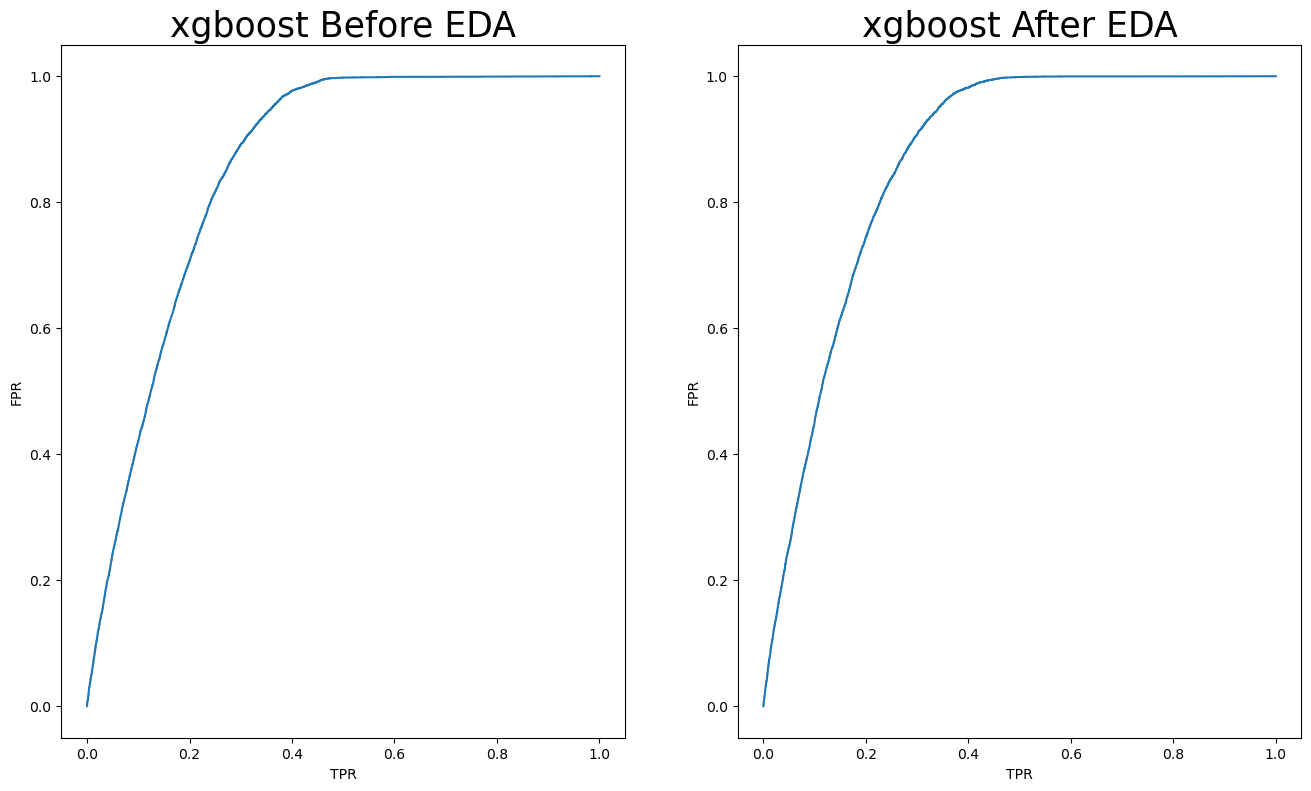

In [200]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.plot(xgb_fpr,xgb_tpr)
plt.title('xgboost Before EDA', fontsize=25)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.subplot(122)
plt.plot(xgb1_fpr,xgb1_tpr)
plt.title('xgboost After EDA', fontsize=25)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.show()



# Conclusion:

In [178]:
#If we concider accuracy then "Xgboost" is the best fitted Model with 87.54% accuracy with Precision (0.43) Recall (0.01) and f1-score (0.034). The classification report of xgboost is also good. So, By comparing df1 and df xgboost is the best Fitted Model with 87.43% accuracy.